# **Step by Step Diabetes Classification-KNN-detailed**

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Basic Data Science and ML Pipeline

OSEMN Pipeline
- O btaining our data
- S crubbing & cleaning our data
- E xploring & Viualizing our data will allow us to find patterns and trends
- M odeling our data will give us our predictive power as a wizard
- iN terpreting our data 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/ESAA-OB/diabetes.csv')

### Basic EDA and statistical analysis
-데이터 탐색

In [ ]:
#verbose=True
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#이상치 탐지
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


-이상치 처리

In [ ]:
diabetes_data_copy=diabetes_data.copy(deep=True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
#Nan값을 평균으로 대체
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(),inplace=True)
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(),inplace=True)

In [ ]:
list1=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in list1:
  diabetes_data_copy[i].fillna(diabetes_data_copy[i].mean(),inplace=True)

In [ ]:
diabetes_data.shape

(768, 9)

-Scaling the data

In [ ]:
#정규화 z=(xi-m)/sigma
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [ ]:
y=diabetes_data_copy.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
test_scores=[]
train_scores=[]

for i in range(1,15):
   knn=KNeighborsClassifier(i)
   knn.fit(X_train,y_train)

   train_scores.append(knn.score(X_train,y_train))
   test_scores.append(knn.score(X_test,y_test))

In [ ]:
max_train_score=max(train_scores)
train_scores_ind=[i for i, v in enumerate(train_scores) if v==max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
max_test_score=max(test_scores)
test_scores_ind=[i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k={}'.format(max_test_score*180,list(map(lambda x: x+1, test_scores_ind))))

Max test score 137.109375 % and k=[11]


- Result Visualisation

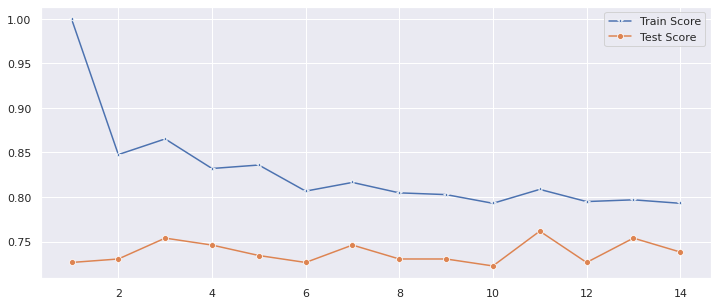

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

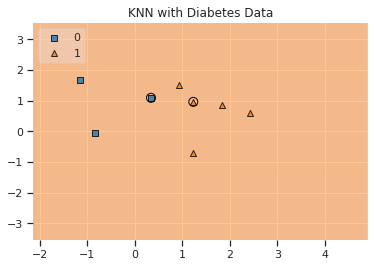

In [ ]:
#decision boundary
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()

## Model performance analysis
### 1. confusion matrix
### 2. classification report
### 3. ROC-AUC

### 1. **confusion matrix**

- 행: 실제 클래스,
  열: 예측한 클래스  
  -> 실제 음성, 예측 음성 | 실제 음성, 예측 양성  
     실제 양성, 예측 음성 | 실제 양성, 예측 양성  
 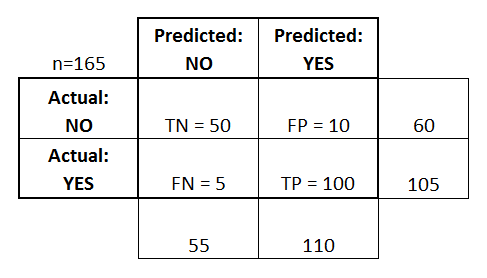

<font color="red">pd.crosstab: 교차표 생성

<font color="red">pd.crosstab(index,columns,rownames,colnames,margins,normalize)

<font color="red">*margins: All index 추가 여부

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,24,167
1,37,52,89
All,180,76,256


<font color="red">sns.heatmap: 시각화

<font color="red"> *annot=True: 수치 표시

<font color="red"> *cmap: 색상변경

<font color="red"> *fmt: 숫자표시

Text(0.5, 12.5, 'Predicted label')

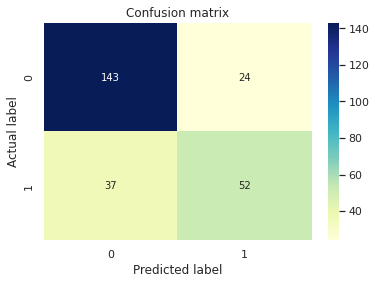

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 2. **Classification Report**
- 정밀도(양성 예측의 정확도) =TP/(TP+FP)
- 재현율(분류기가 정확하게 예측한 양성 샘플의 비율) =TP/(TP+FN)
- F1 점수(정밀도와 재현율의 가중 조화 평균) =2 x (precision x recall)/(precision + recall)

*정밀도와 재현율이 비슷한 분류기에서 F1점수가 높지만, 항상 바람직한 것은 아님 

상황에 따라 정밀도 또는 재현율이 중요할 수 있음

<font color="red"> *support: 실제 샘플 개수

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.58      0.63        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.73       256
weighted avg       0.76      0.76      0.76       256



### 3. **ROC-AUC**
- ROC(Receiver Operation Characterisitc Curve) 곡선
  - 거짓 양성 비율에 대한 진짜 양성 비율의 곡선
 - 1-특이도(진짜 음성 비율)
  - 좋은 분류기는 점선에서 최대한 멀리 떨어져 있어야 함
  - 양성클래스가 드물거나 거짓양성이 더 중요할 때: PR(정밀도/재현율)곡선 사용, 그렇지 않으면 ROC곡선 사용

- AUC(Area Under Curve) 스코어
  - ROC 곡선 밑의 면적을 구한 값
  - 1에 가까울수록 성능이 좋음



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

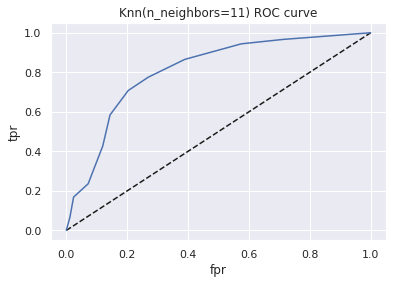

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8072730942609163

## **Hyper parameter optimization**
- grid search: 최적의 하이퍼파라미터 찾기 위한 방법
- KNN(K-Nearest Neighbors)
  - K(n_neighbors)개의 이웃으로 분류

<font color="red"> GridSearchCV(estimator,param_grid,scoring,cv,refit=True)

<font color="red"> *estimator: classifier, regressor 등

<font color="red"> *param_grid: 파라미터명+파라미터 값 조합의 딕셔너리

<font color="red"> *scoring: 평가방법

<font color="red"> *cv: 교차 검증 폴드 수


<font color="red"> *refit: 최적의 하이퍼파라미터를 찾은 뒤 estimator 객체를 해당 파라미터로 재학습

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7748068924539513
Best Parameters: {'n_neighbors': 25}
